In [14]:
# Run this cell
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import shap
%matplotlib inline


In [15]:
data = pd.read_csv('./data/data.csv')
data = data.fillna(0)
data.head()

,CuChun,JingChun,ErJiaMi,CuSuan,YiChangYiErChun,ErChangYiErChun,YeTiChanPin,YiJing,FaDianLiang,YiQiYouXiaoQi,ErQiYouXiaoQi,YiErChunQingZuFen,YiErChunZhongZuFen,RanMei
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,438.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,433.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,432.0


In [16]:
from sklearn.model_selection import train_test_split
np.random.seed(45)

X = data.drop(['RanMei'], axis=1)
Y = data['RanMei']

X_train, X_holdout, Y_train, Y_holdout = train_test_split(X, Y, test_size=0.1)


<>:9: SyntaxWarning: invalid escape sequence '\h'
<>:9: SyntaxWarning: invalid escape sequence '\h'
C:\Users\24349\AppData\Local\Temp\ipykernel_5408\4114136233.py:9: SyntaxWarning: invalid escape sequence '\h'
  plt.ylabel("Predicted RanMei $(\hat{y})$")


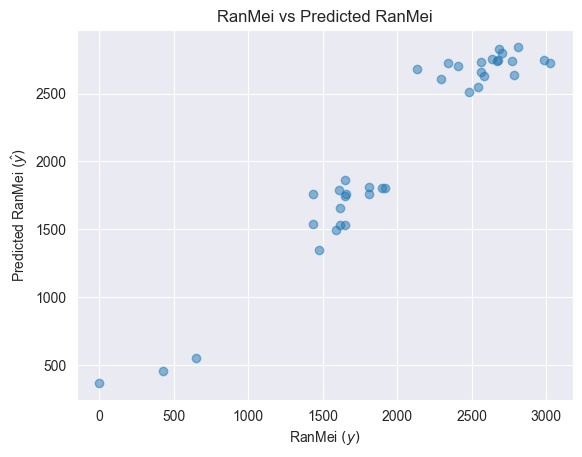

In [25]:
model = LinearRegression()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_holdout)

# Plot predicted vs true RanMei
plt.scatter(Y_holdout, Y_pred, alpha=0.5)
plt.xlabel("RanMei $(y)$")
plt.ylabel("Predicted RanMei $(\hat{y})$")
plt.title("RanMei vs Predicted RanMei");


<>:2: SyntaxWarning: invalid escape sequence '\h'
<>:3: SyntaxWarning: invalid escape sequence '\h'
<>:2: SyntaxWarning: invalid escape sequence '\h'
<>:3: SyntaxWarning: invalid escape sequence '\h'
C:\Users\24349\AppData\Local\Temp\ipykernel_5408\702678444.py:2: SyntaxWarning: invalid escape sequence '\h'
  plt.ylabel("Residual $(y - \hat{y})$")
C:\Users\24349\AppData\Local\Temp\ipykernel_5408\702678444.py:3: SyntaxWarning: invalid escape sequence '\h'
  plt.xlabel("Predicted RanMei $(\hat{y})$")


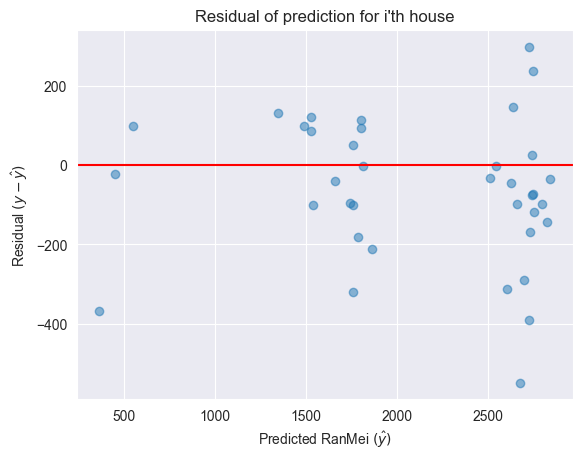

In [26]:
plt.scatter(Y_pred, Y_holdout - Y_pred, alpha=0.5)
plt.ylabel("Residual $(y - \hat{y})$")
plt.xlabel("Predicted RanMei $(\hat{y})$")
plt.title("Residuals vs Predicted RanMei")
plt.title("Residual of prediction for i'th house")
plt.axhline(y = 0, color='r');


In [27]:
def rmse(actual_y, predicted_y):
    """
    Args:
        predicted_y: an array of the prediction from the model
        actual_y: an array of the ground-truth label
        
    Returns:
        The root mean square error between the prediction and the ground-truth
    """
    return np.sqrt(np.mean((predicted_y - actual_y)**2))

train_error = rmse(Y_train, model.predict(X_train))
holdout_error = rmse(Y_holdout, Y_pred)

print("Training RMSE:", train_error)
print("Holdout RMSE:", holdout_error)


Training RMSE: 173.0141799427949
Holdout RMSE: 189.62732337201444


## shap display

In [18]:
background = shap.utils.sample(X, 100)
explainer = shap.Explainer(model.predict, background)
shap_values = explainer(X)

.values =
array([[ 664.19454776,  -52.01627149,  -34.04697665, ..., -742.98645034,
           6.15255702,    9.37072302],
       [ 664.19454776,  -52.01627149,  -34.04697665, ..., -742.98645034,
           6.15255702,    9.37072302],
       [ 664.19454776,  -52.01627149,  -34.04697665, ..., -742.98645034,
           6.15255702,    9.37072302],
       ...,
       [ -27.92535932,   17.37889598,  -34.04697665, ..., -220.94940335,
          -6.10617263,   -7.61548185],
       [ -67.01685299,   20.23359621,  -34.04697665, ..., -215.39581774,
          -6.76880667,   -7.61548185],
       [ -39.95351122,   20.49311441,  -34.04697665, ..., -212.61902494,
          -6.76880667,   -7.61548185]])

.base_values =
array([2116.43246805, 2116.43246805, 2116.43246805, 2116.43246805,
       2116.43246805, 2116.43246805, 2116.43246805, 2116.43246805,
       2116.43246805, 2116.43246805, 2116.43246805, 2116.43246805,
       2116.43246805, 2116.43246805, 2116.43246805, 2116.43246805,
       2116.43246805,

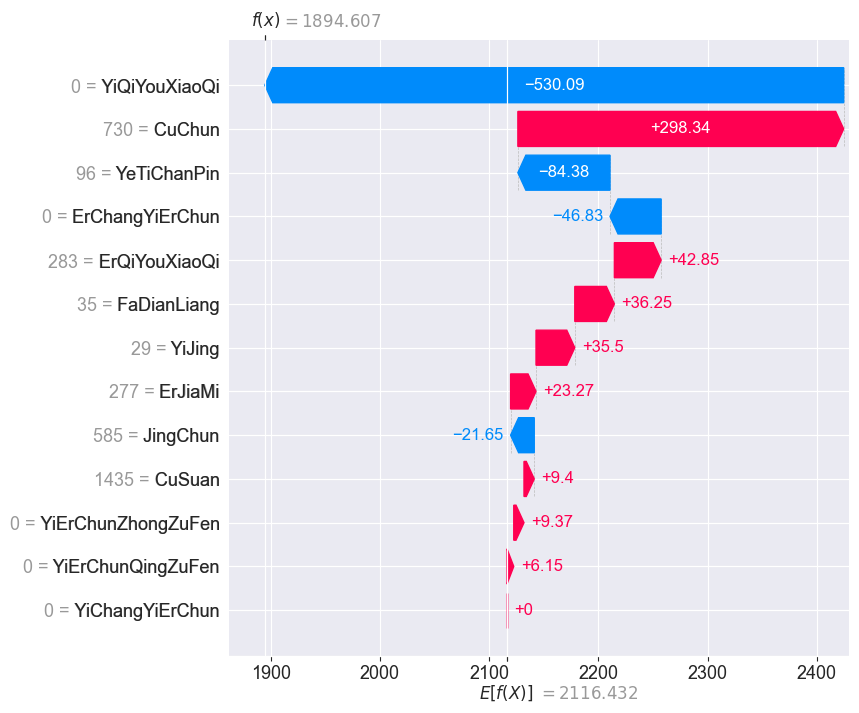

In [31]:
sample_id = np.random.randint(0, len(X))
print(shap_values)
print(shap_values.shape)
shap.plots.waterfall(shap_values[sample_id], max_display=15)

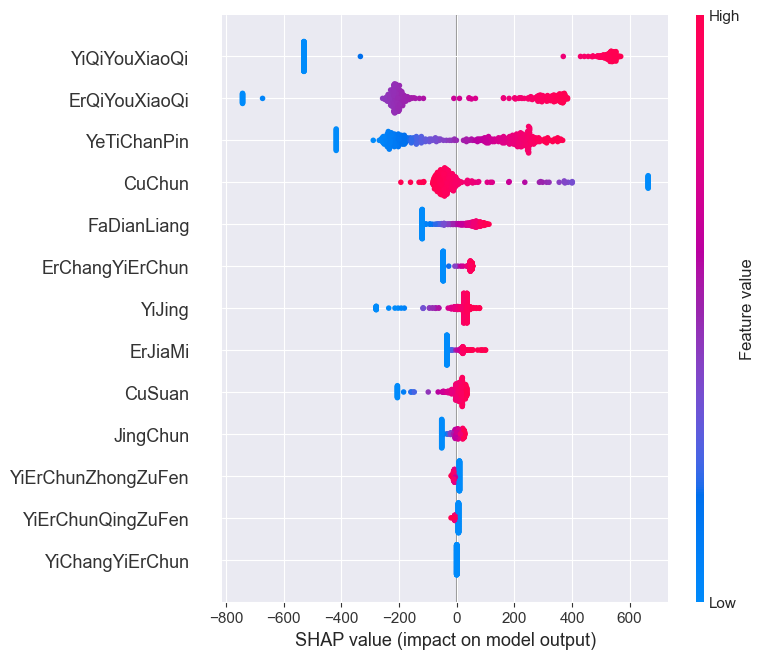

In [22]:
shap.summary_plot(shap_values, X)